Shape: (284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1

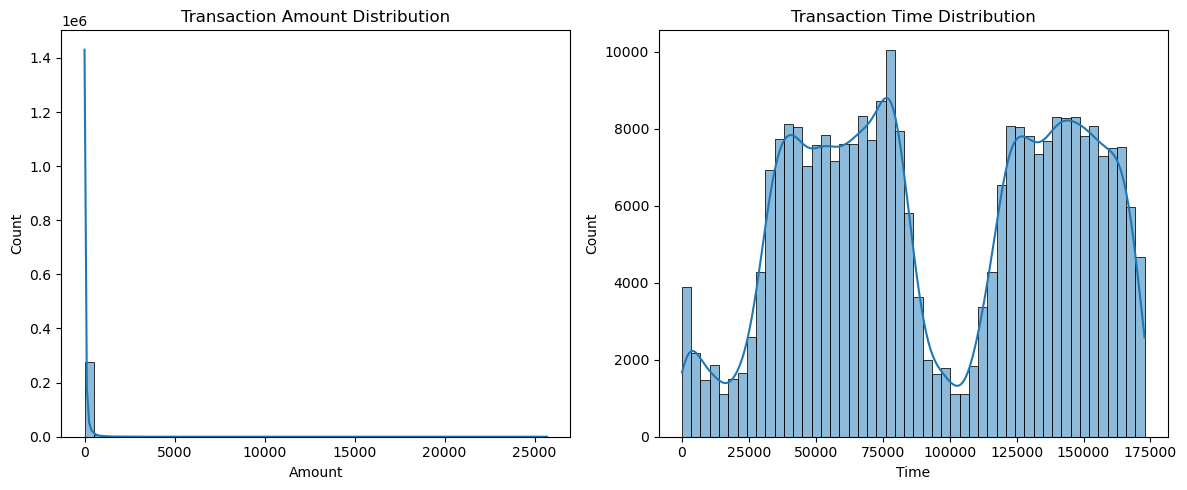

Confusion Matrix:
[[284113    202]
 [   409     83]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9986    0.9993    0.9989    284315
           1     0.2912    0.1687    0.2136       492

    accuracy                         0.9979    284807
   macro avg     0.6449    0.5840    0.6063    284807
weighted avg     0.9973    0.9979    0.9976    284807

Total predicted frauds: 285
Actual frauds: 492


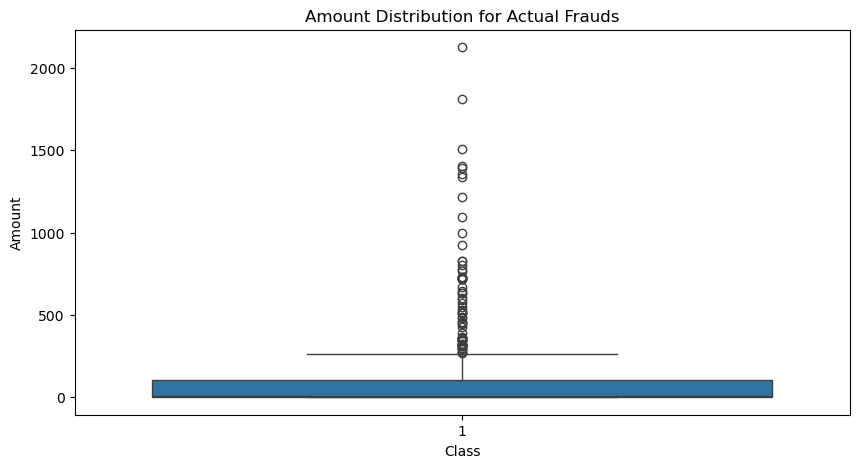

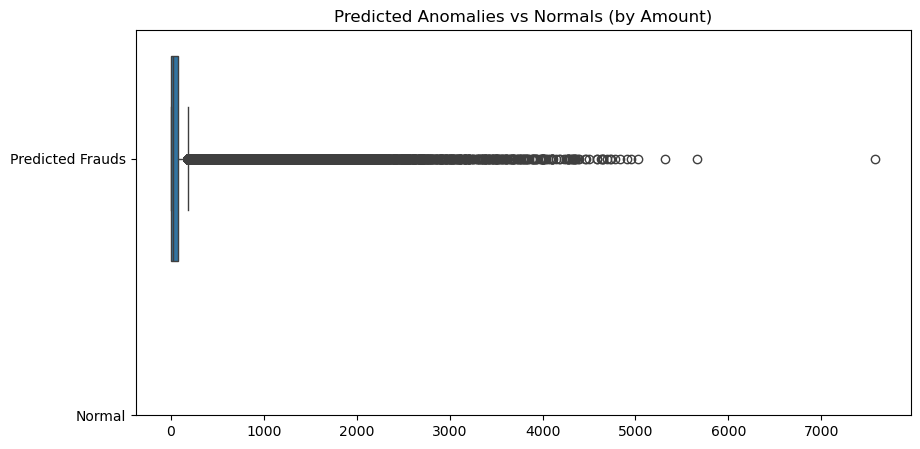

In [12]:
# -----------------------------------
# 📌 Step 1: Load Libraries
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------
# 📌 Step 2: Load the Dataset
# -----------------------------------
df = pd.read_csv('data/archive/creditcard.csv')

print("Shape:", df.shape)
df.head()

# -----------------------------------
# 📌 Step 3: Data Exploration
# -----------------------------------
# Summary statistics
print(df.describe())

# Class distribution (not used in model)
print("Class Distribution:\n", df['Class'].value_counts(normalize=True))

# Visualize Amount and Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')

plt.tight_layout()
plt.show()

# -----------------------------------
# 📌 Step 4: Preprocessing
# -----------------------------------
X = df.drop(columns=['Class'])  # Features only
y = df['Class']                 # Save labels for evaluation

# Scale 'Amount' and 'Time' (V1-V28 are already scaled)
scaler = MinMaxScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# -----------------------------------
# 📌 Step 5: Model - Isolation Forest
# -----------------------------------
# Create the model
iso = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
y_pred_iso = iso.fit_predict(X)

# Convert prediction: -1 = fraud (1), 1 = normal (0)
y_pred_binary = np.where(y_pred_iso == -1, 1, 0)

# -----------------------------------
# 📌 Step 6: Evaluation
# -----------------------------------
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y, y_pred_binary, digits=4))

# -----------------------------------
# 📌 Step 7: Insights & Visualization
# -----------------------------------
# How many anomalies detected
print("Total predicted frauds:", sum(y_pred_binary))
print("Actual frauds:", sum(y))

# Compare detected fraud transactions
anomalies = df[y_pred_binary == 1]
normal = df[y_pred_binary == 0]

plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df[df['Class'] == 1])
plt.title('Amount Distribution for Actual Frauds')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=[anomalies['Amount'], normal['Amount']], orient='h')
plt.yticks([0, 1], ['Predicted Frauds', 'Normal'])
plt.title('Predicted Anomalies vs Normals (by Amount)')
plt.show()
